In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
df1 = pd.read_excel('experiment\excel_file.xlsx')

In [82]:
df1.drop(df1.index[0], inplace=True)

In [83]:
df1 = df1.sort_values('Zeit').dropna(subset=['Zeit', 'Kraft'])

In [84]:
column_names = df1.columns.to_list()
column_names[0] = 'Zeit [s]'
column_names[1] = 'Kraft [N]'
column_names[2] = 'Spannung [N/mm²]'
column_names[3] = 'Weg [mm]'
column_names[4] = 'Länge [mm]'
column_names[5] = 'Dehnung [%]'

data = {column_names[0]: df1['Zeit'],
        column_names[1]: df1['Kraft'],
        column_names[2]: df1['Spannung'],
        column_names[3]: df1['Weg'],
        column_names[4]: df1['Länge'],
        column_names[5]: df1['Dehnung']}

df = pd.DataFrame(data)

In [85]:
df.head()

,Zeit [s],Kraft [N],Spannung [N/mm²],Weg [mm],Länge [mm],Dehnung [%]
1,0.26,-3.15,-0.000401,0.027808,0.000043,0.000043
2,1.26,0,0,0.111141,0.000055,0.000055
3,2.26,0,0,0.194427,0.000022,0.000022
4,3.26,2.52,0.000321,0.277806,0.000055,0.000055
5,4.26,-3.15,-0.000401,0.361138,0.000055,0.000055


In [86]:
df.describe()

,Zeit [s],Kraft [N],Spannung [N/mm²],Weg [mm],Länge [mm],Dehnung [%]
count,273850.00,273850.000000,273850.000000,273850.000000,273850.000000,273850.000000
unique,273850.00,291.000000,291.000000,3265.000000,5971.000000,5971.000000
top,273849.26,200.970001,0.025588,2.753938,0.274413,0.274413
freq,1.00,75639.000000,75639.000000,667.000000,654.000000,654.000000


In [87]:
thresholds = [0]
for i in range(len(df['Zeit [s]']) -1):
    if (abs(df['Kraft [N]'].iloc[i] - df['Kraft [N]'].iloc[i + 1]) > 6000) and (abs(df['Kraft [N]'].iloc[i + 1] - df['Kraft [N]'].iloc[i + 2]) < 6000):
        thresholds.append(df.index[i - 8])
len(thresholds)

13

In [88]:
thresholds.sort()
thresholds

[0,
 np.int64(26),
 np.int64(3644),
 np.int64(25263),
 np.int64(46881),
 np.int64(90100),
 np.int64(133318),
 np.int64(176537),
 np.int64(219755),
 np.int64(241374),
 np.int64(262992),
 np.int64(266611),
 np.int64(270229)]

In [89]:
thresholds.pop(1)
thresholds

[0,
 np.int64(3644),
 np.int64(25263),
 np.int64(46881),
 np.int64(90100),
 np.int64(133318),
 np.int64(176537),
 np.int64(219755),
 np.int64(241374),
 np.int64(262992),
 np.int64(266611),
 np.int64(270229)]

In [90]:
dataframes = []
dataframes.append(df.loc[:thresholds[1]])

for i in range(1, len(thresholds) - 1):
    dataframes.append(df.loc[thresholds[i]:thresholds[i + 1]])

dataframes.append(df.loc[thresholds[-1]:])

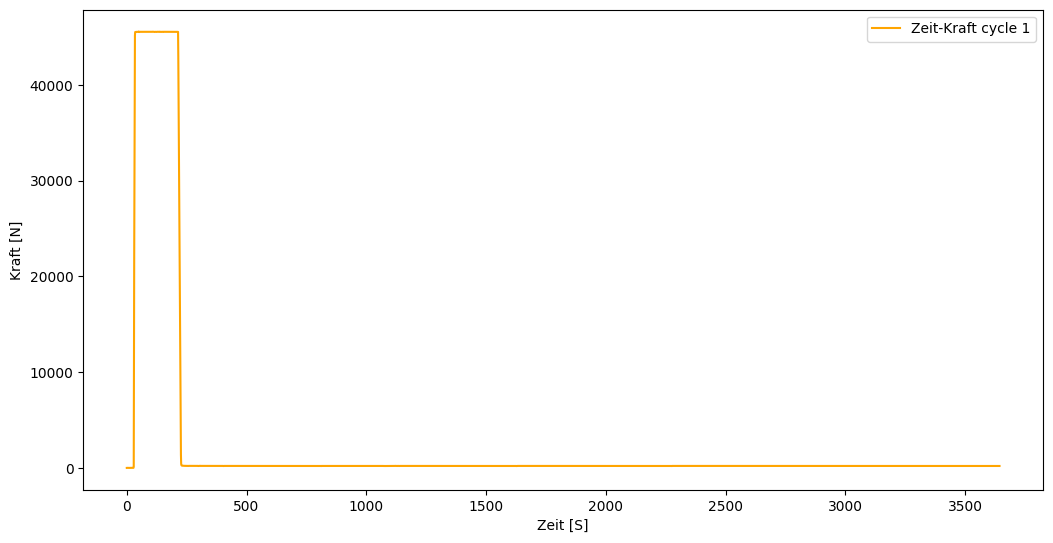

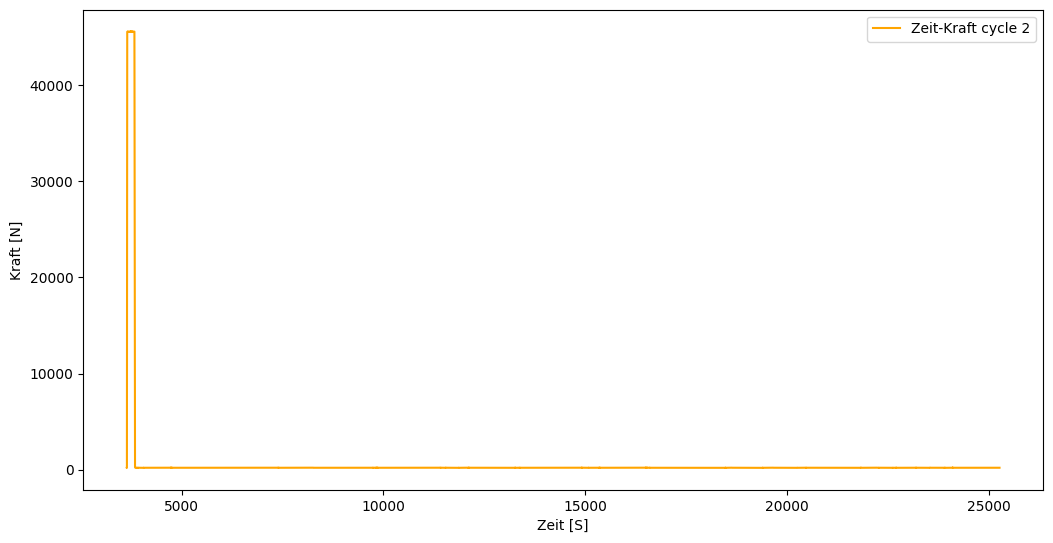

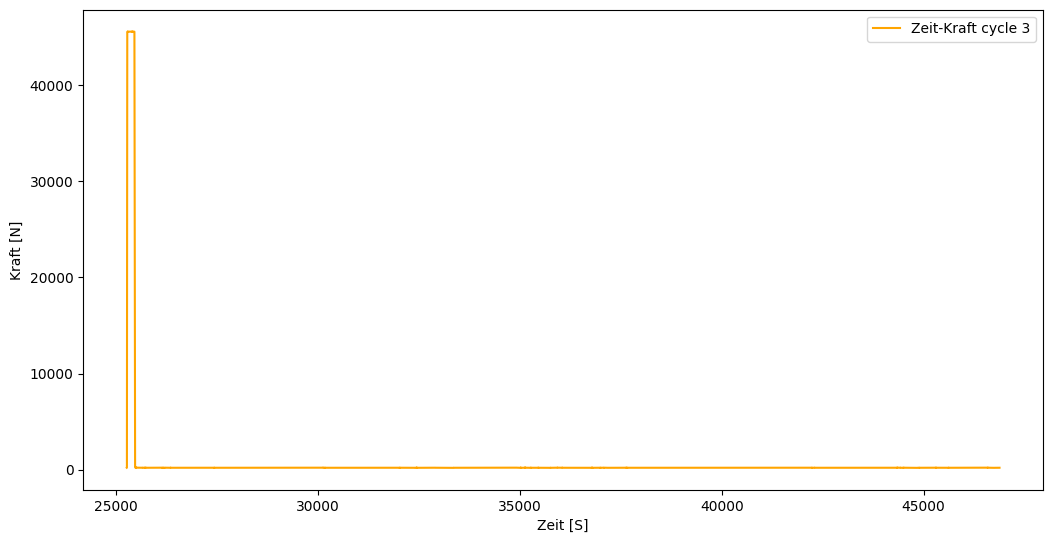

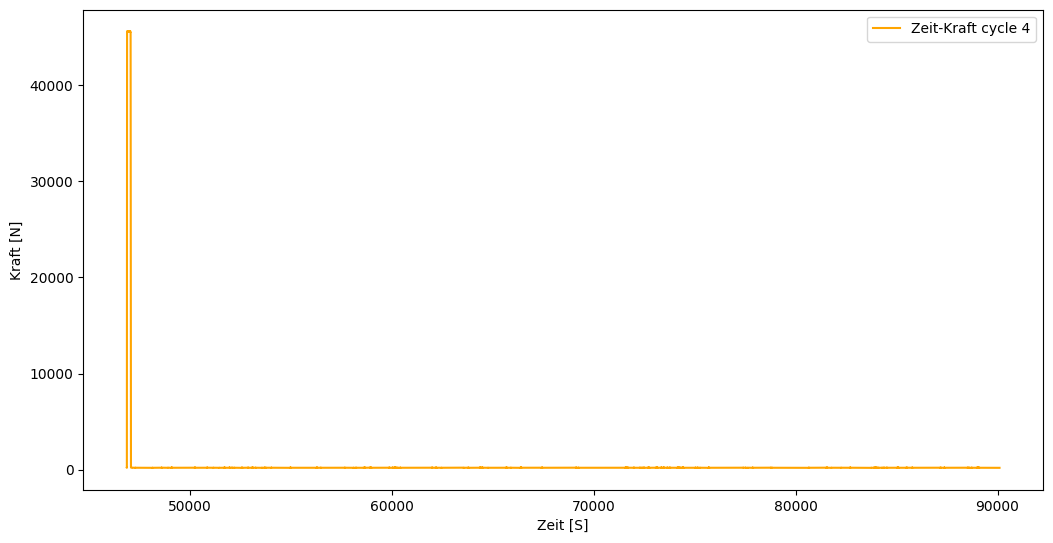

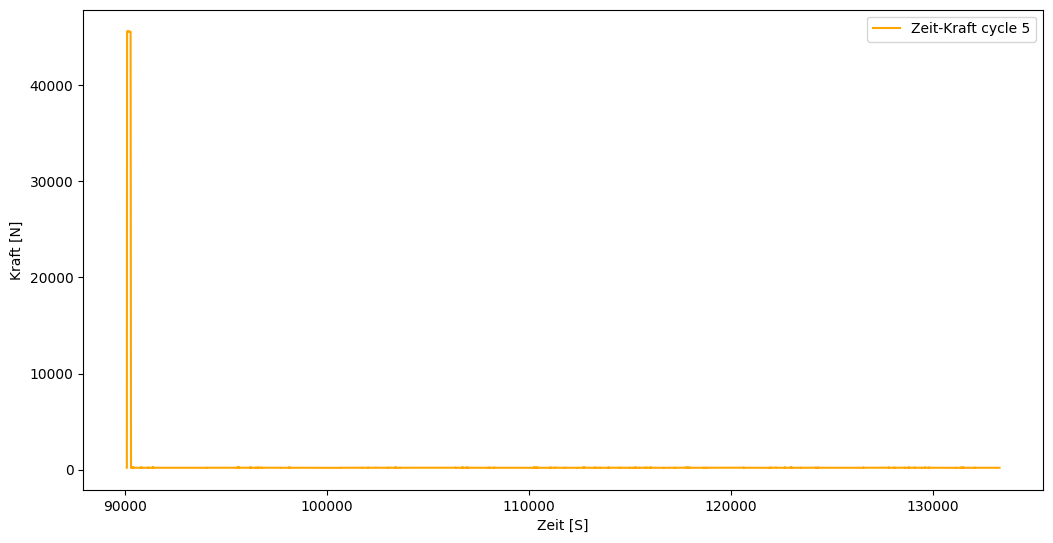

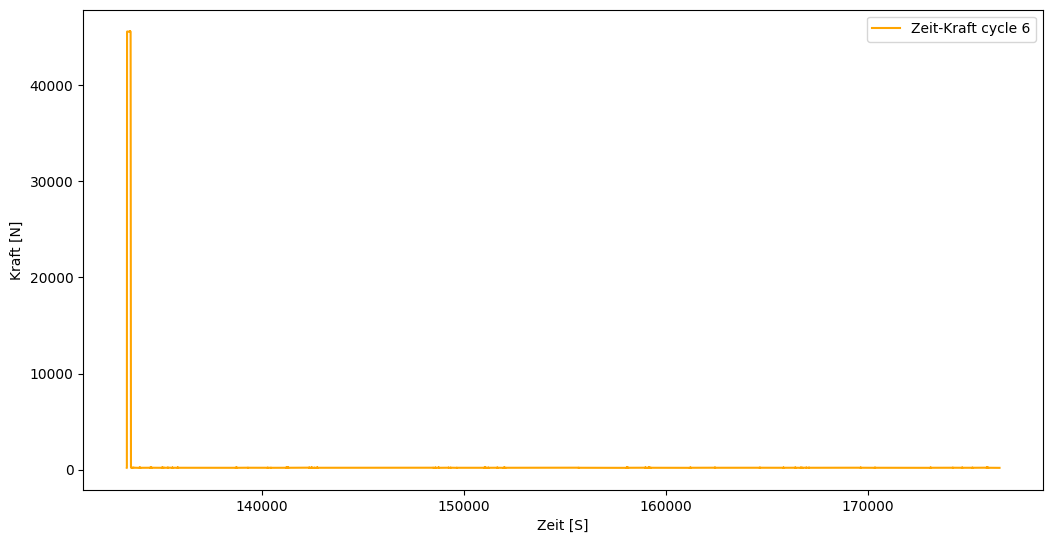

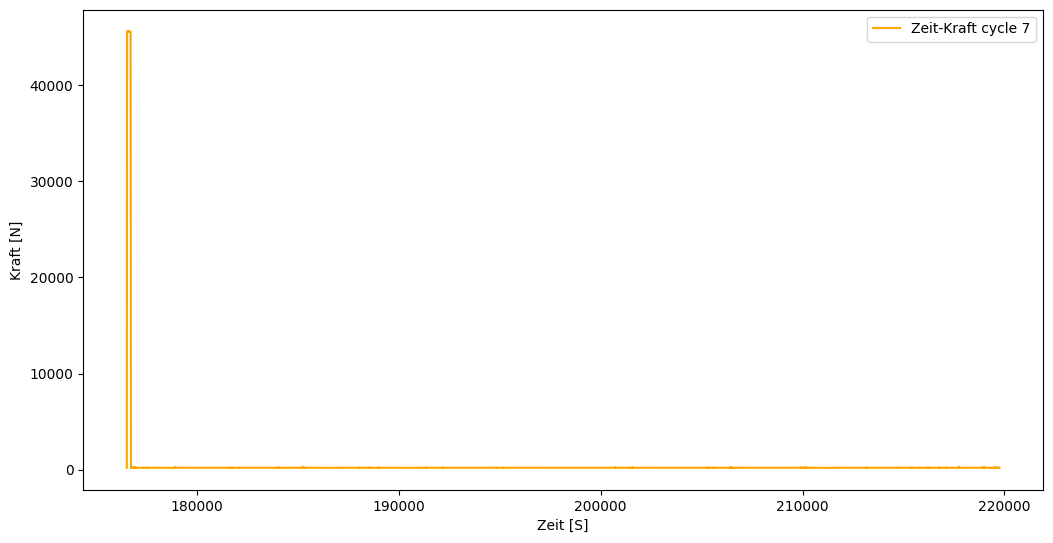

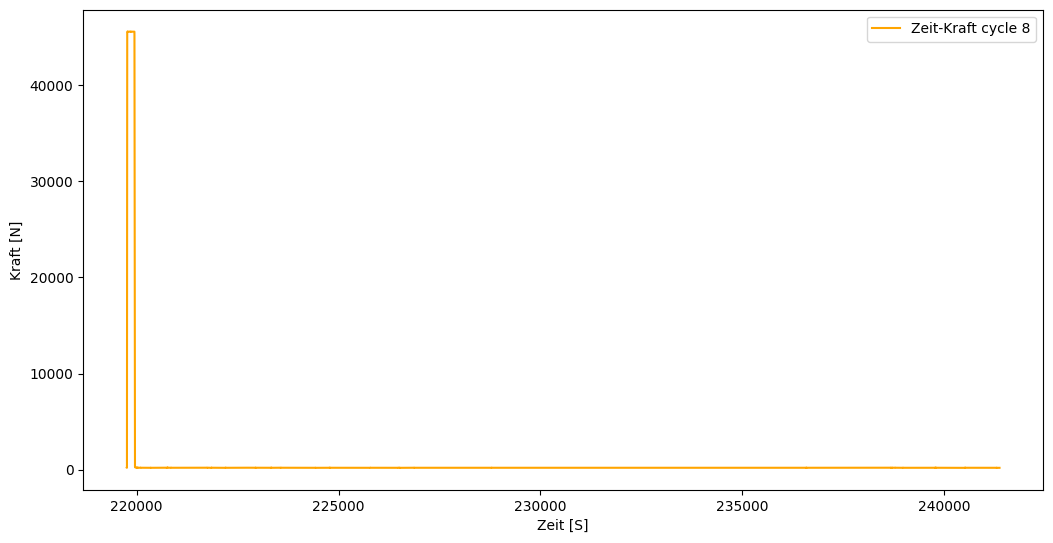

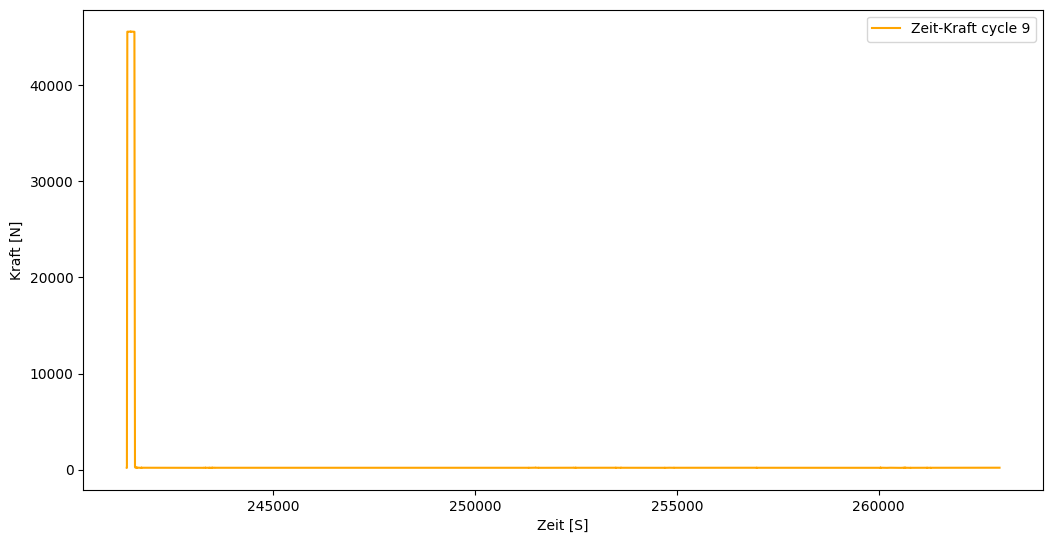

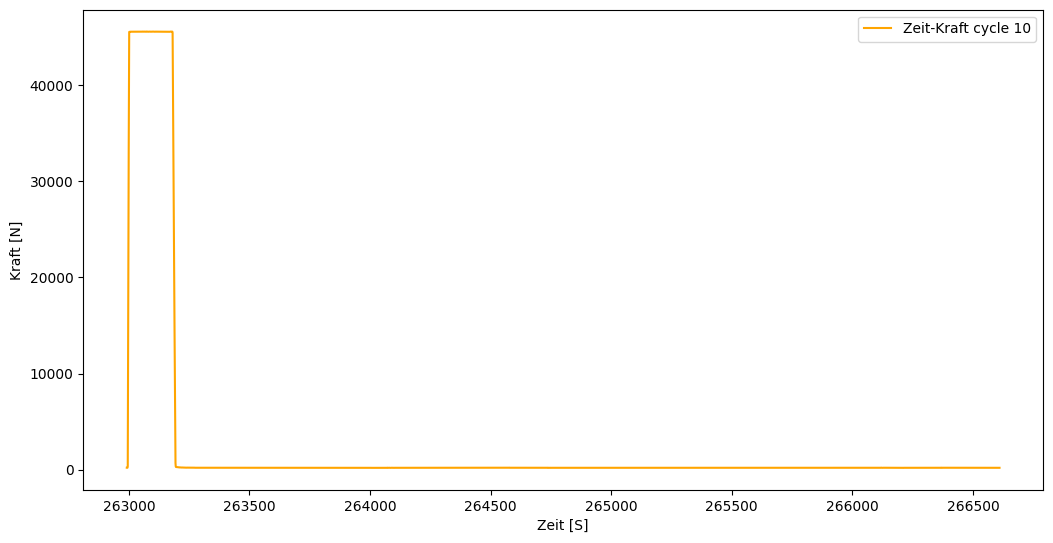

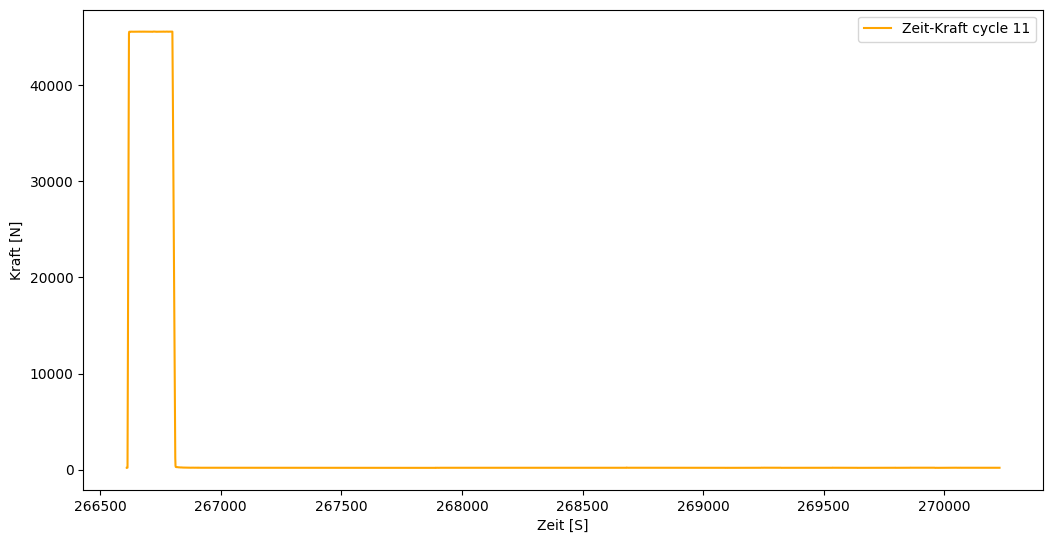

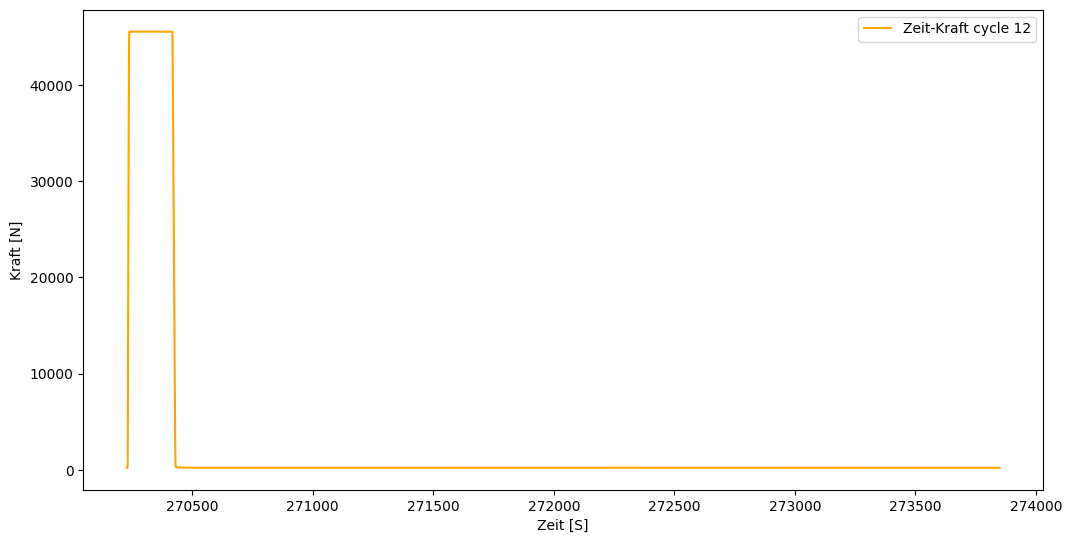

In [91]:
for i in range(len(dataframes)):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax.plot(dataframes[i]['Zeit [s]'], dataframes[i]['Kraft [N]'], color='orange', label='Zeit-Kraft cycle {}'.format(i+1))
    ax.set_xlabel('Zeit [S]')
    ax.set_ylabel('Kraft [N]')
    ax.legend()
    plt.savefig('experiment\Plots\cycle {}.png'.format(i+1))
    plt.show()
    plt.close()

In [92]:
with pd.ExcelWriter('experiment\excel_file (edited).xlsx') as writer:
        for i in range(len(dataframes)):
            dataframes[i].to_excel(writer, sheet_name='cycle {}'.format(i+1), index=False)

In [93]:
for i in range(len(dataframes)):
    filename = 'experiment\Cycles_ExcelFiles\cycle {}.xlsx'.format(i+1)
    with pd.ExcelWriter(filename) as writer:
        dataframes[i].to_excel(writer, sheet_name='cycle', index=False)
